In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import GridSearchCV

* Load data

In [3]:
data=pd.read_csv(r"C:\Users\dell\Downloads\archive (8).zip")
data

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.000000,NaN
1,1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.000000,NaN
2,2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.000000,NaN
3,3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.000000,NaN
4,4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34862,34862,2/7/2016,2016.0,February,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.000000,NaN
34863,34863,3/13/2015,2015.0,March,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.000000,NaN
34864,34864,4/5/2015,2015.0,April,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.000000,NaN
34865,34865,8/30/2015,2015.0,August,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2320.00,1568.000000,2320.0,1568.000000,NaN


* checking the number of rows and columns

In [5]:
data.shape

(34867, 16)

* Getting info

In [7]:
data.info

<bound method DataFrame.info of        index       Date    Year     Month  Customer Age Customer Gender  \
0          0  2/19/2016  2016.0  February          29.0               F   
1          1  2/20/2016  2016.0  February          29.0               F   
2          2  2/27/2016  2016.0  February          29.0               F   
3          3  3/12/2016  2016.0     March          29.0               F   
4          4  3/12/2016  2016.0     March          29.0               F   
...      ...        ...     ...       ...           ...             ...   
34862  34862   2/7/2016  2016.0  February          38.0               M   
34863  34863  3/13/2015  2015.0     March          38.0               M   
34864  34864   4/5/2015  2015.0     April          38.0               M   
34865  34865  8/30/2015  2015.0    August          38.0               M   
34866  34866        NaN     NaN       NaN           NaN             NaN   

             Country           State Product Category     Sub Categ

* checking for missing value

In [9]:
data.isnull().sum()

index                   0
Date                    1
Year                    1
Month                   1
Customer Age            1
Customer Gender         1
Country                 1
State                   1
Product Category        1
Sub Category            1
Quantity                1
Unit Cost               1
Unit Price              1
Cost                    1
Revenue                 0
Column1             32293
dtype: int64

*  Handle missing values

In [11]:
data.dropna(subset=['Quantity', 'Unit Cost', 'Unit Price', 'Cost', 'Revenue'], inplace=True)

In [12]:
ds=data.drop(['Date','Year','Month','Country','Customer Age','State','Sub Category','Column1'],axis=1) 

In [13]:
ds

,index,Customer Gender,Product Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,0,F,Accessories,1.0,80.00,109.000000,80.0,109.0
1,1,F,Clothing,2.0,24.50,28.500000,49.0,57.0
2,2,F,Accessories,3.0,3.67,5.000000,11.0,15.0
3,3,F,Accessories,2.0,87.50,116.500000,175.0,233.0
4,4,F,Accessories,3.0,35.00,41.666667,105.0,125.0
...,...,...,...,...,...,...,...,...
34861,34861,M,Bikes,1.0,2049.00,1487.000000,2049.0,1487.0
34862,34862,M,Bikes,2.0,1160.00,985.500000,2320.0,1971.0
34863,34863,M,Bikes,1.0,2049.00,1583.000000,2049.0,1583.0
34864,34864,M,Bikes,3.0,683.00,560.666667,2049.0,1682.0


In [14]:
from sklearn.preprocessing import LabelEncoder 

In [15]:
import warnings    # remove warnings
warnings.filterwarnings("ignore") 

In [16]:
ds['Customer Gender']=LabelEncoder().fit_transform(ds['Customer Gender']) 

In [17]:
ds['Product Category']=LabelEncoder().fit_transform(ds['Product Category'])

In [18]:
ds

,index,Customer Gender,Product Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,0,0,0,1.0,80.00,109.000000,80.0,109.0
1,1,0,2,2.0,24.50,28.500000,49.0,57.0
2,2,0,0,3.0,3.67,5.000000,11.0,15.0
3,3,0,0,2.0,87.50,116.500000,175.0,233.0
4,4,0,0,3.0,35.00,41.666667,105.0,125.0
...,...,...,...,...,...,...,...,...
34861,34861,1,1,1.0,2049.00,1487.000000,2049.0,1487.0
34862,34862,1,1,2.0,1160.00,985.500000,2320.0,1971.0
34863,34863,1,1,1.0,2049.00,1583.000000,2049.0,1583.0
34864,34864,1,1,3.0,683.00,560.666667,2049.0,1682.0


In [19]:
ds.isnull().sum()

index               0
Customer Gender     0
Product Category    0
Quantity            0
Unit Cost           0
Unit Price          0
Cost                0
Revenue             0
dtype: int64

* outlier treatment

In [21]:
Q1 = data['Revenue'].quantile(0.25)
Q3 = data['Revenue'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['Revenue'] < (Q1 - 1.5 * IQR)) | (data['Revenue'] > (Q3 + 1.5 * IQR)))]

* Correlation heatmap

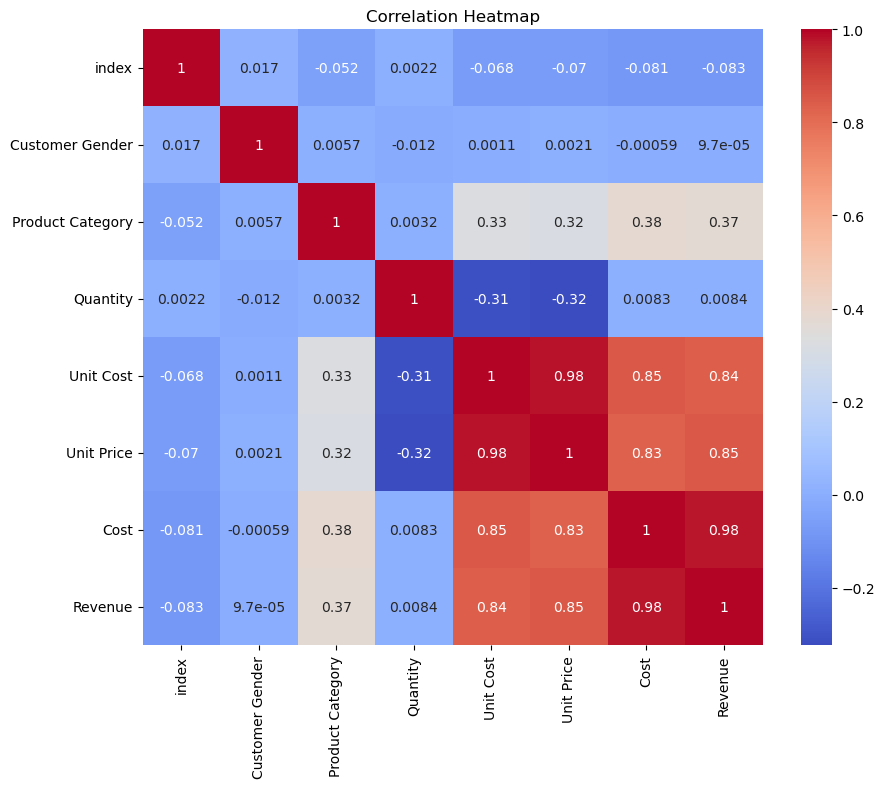

In [23]:
corr = ds.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

* Boxplot for Revenue

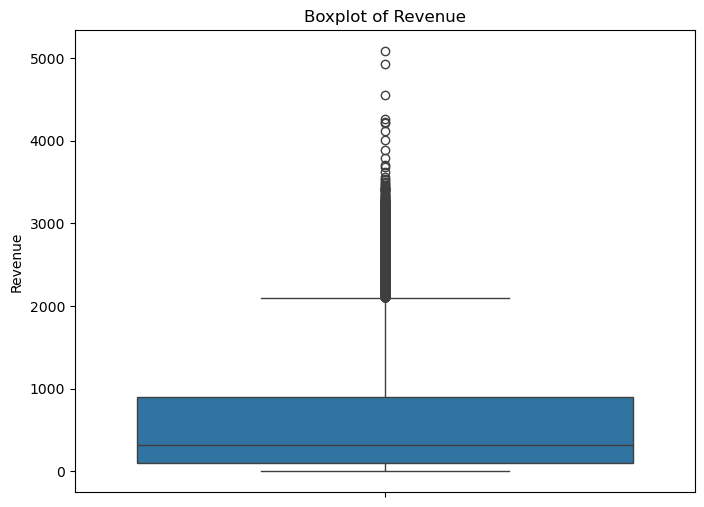

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(ds['Revenue'])
plt.title('Boxplot of Revenue')
plt.show()

* Prepare Features and Target Variable

In [27]:
x = ds.drop(["Revenue"], axis=1)

In [28]:
y = ds[["Revenue"]]

* Split data

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
x_train

,index,Customer Gender,Product Category,Quantity,Unit Cost,Unit Price,Cost
24328,24328,1,0,2.0,15.00,20.500000,30.0
5096,5096,1,0,3.0,38.33,54.000000,115.0
14118,14118,0,2,2.0,150.00,175.000000,300.0
18429,18429,0,0,2.0,35.00,42.000000,70.0
17957,17957,0,0,1.0,455.00,543.000000,455.0
...,...,...,...,...,...,...,...
16850,16850,0,0,1.0,554.00,601.000000,554.0
6265,6265,0,0,2.0,42.50,55.000000,85.0
11284,11284,1,1,3.0,765.00,716.000000,2295.0
860,860,1,0,3.0,43.33,60.000000,130.0


In [32]:
x_test

,index,Customer Gender,Product Category,Quantity,Unit Cost,Unit Price,Cost
34434,34434,1,0,3.0,23.33,30.000000,70.0
29668,29668,0,0,3.0,31.67,32.000000,95.0
9946,9946,0,0,3.0,44.00,59.000000,132.0
396,396,0,0,1.0,400.00,498.000000,400.0
28005,28005,1,2,1.0,416.00,477.000000,416.0
...,...,...,...,...,...,...,...
3509,3509,0,0,3.0,291.67,326.666667,875.0
8194,8194,0,1,3.0,567.00,579.666667,1701.0
27770,27770,1,0,2.0,25.00,30.500000,50.0
22541,22541,1,2,2.0,49.50,62.500000,99.0


In [33]:
y_train

,Revenue
24328,41.0
5096,162.0
14118,350.0
18429,84.0
17957,543.0
...,...
16850,601.0
6265,110.0
11284,2148.0
860,180.0


In [34]:
y_test

,Revenue
34434,90.0
29668,96.0
9946,177.0
396,498.0
28005,477.0
...,...
3509,980.0
8194,1739.0
27770,61.0
22541,125.0


* Linear regression model

In [36]:
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [37]:
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)

In [38]:
print('train_score:',r2_score(train_pred,y_train))
print('test_score:',r2_score(test_pred,y_test))
print('MAE(train):',mean_absolute_error(train_pred,y_train))
print('MAE(test):',mean_absolute_error(test_pred,y_test))
print('MSE(train):',mean_squared_error(train_pred,y_train))
print('MSE(test):',mean_squared_error(test_pred,y_test))

train_score: 0.9925884853890374
test_score: 0.9925976297894419
MAE(train): 34.74269187250309
MAE(test): 34.47647916493926
MSE(train): 3992.604199757449
MSE(test): 4001.5711640287536


* Hyperparameter Tuning

In [40]:
from sklearn.linear_model import Ridge
ridge=Ridge()
param={'alpha': [0.01, 0.1, 1, 10, 100]}

#gridsearch cv
gscv=GridSearchCV(ridge,param,cv=5)
gscv.fit(x_train,y_train)

print("Best Ridge Parameters:", gscv.best_params_)
print("Best Ridge Score:", gscv.best_score_)

Best Ridge Parameters: {'alpha': 10}
Best Ridge Score: 0.992630475129635


* Visualization

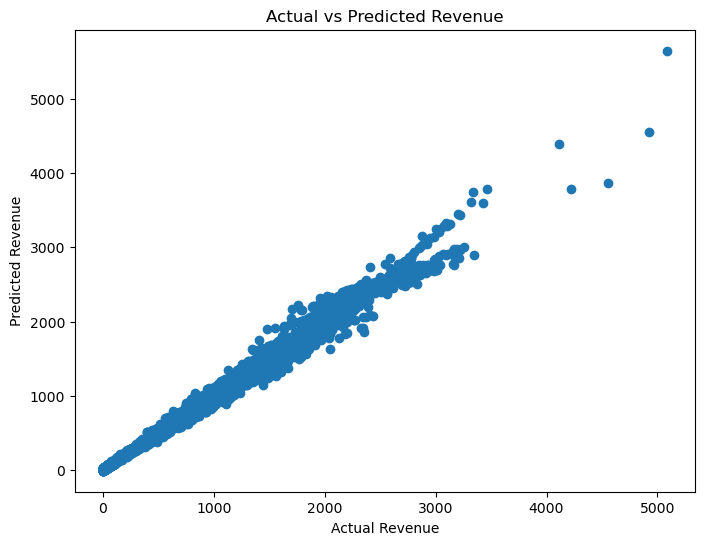

In [42]:
# Plot predictions vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_pred)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue')
plt.show()

* Decision tree model

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [117]:
train_pred=dt_model.predict(x_train)
test_pred=dt_model.predict(x_test)

In [119]:
print('train_score:',r2_score(train_pred,y_train))
print('test_score:',r2_score(test_pred,y_test))
print('MAE(train):',mean_absolute_error(train_pred,y_train))
print('MAE(test):',mean_absolute_error(test_pred,y_test))
print('MSE(train):',mean_squared_error(train_pred,y_train))
print('MSE(test):',mean_squared_error(test_pred,y_test))

train_score: 1.0
test_score: 0.9982528863279588
MAE(train): 0.0
MAE(test): 2.345139088041296
MSE(train): 0.0
MSE(test): 942.9060797246917


* Hyperparameter Tuning

In [122]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(), 
                           param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(x_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


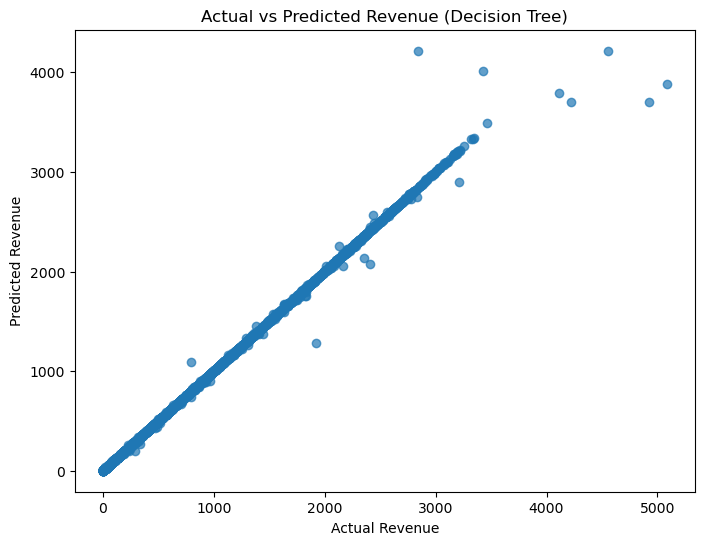

In [123]:
# Predictions vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_pred, alpha=0.7)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue (Decision Tree)')
plt.show()


* Random Forest model

In [125]:
from sklearn.ensemble import RandomForestRegressor

In [126]:
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [131]:
train_pred=rf_model.predict(x_train)
test_pred=rf_model.predict(x_test)

In [132]:
print('train_score:',r2_score(train_pred,y_train))
print('test_score:',r2_score(test_pred,y_test))
print('MAE(train):',mean_absolute_error(train_pred,y_train))
print('MAE(test):',mean_absolute_error(test_pred,y_test))
print('MSE(train):',mean_squared_error(train_pred,y_train))
print('MSE(test):',mean_squared_error(test_pred,y_test))

train_score: 0.9999719802775158
test_score: 0.9984447840912142
MAE(train): 0.52985658970314
MAE(test): 1.9097175222254086
MSE(train): 15.19581966872222
MSE(test): 836.073770418698


* Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [5, 10, 20],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(x_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)